# Classification Project

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [76]:
from sklearn.metrics import (
    classification_report, f1_score, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay
)

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
# Add other models as needed


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## The Data

In [40]:
# Load and merge training data
train_cat = pd.read_excel(r"C:\Users\DELL\Desktop\MachineLearning\classification_project\TRAIN_NEW\TRAIN_CATEGORICAL_METADATA_new.xlsx")
train_FCM = pd.read_csv(r"C:\Users\DELL\Desktop\MachineLearning\classification_project\TRAIN_NEW\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
train_Quant = pd.read_excel(r"C:\Users\DELL\Desktop\MachineLearning\classification_project\TRAIN_NEW\TRAIN_QUANTITATIVE_METADATA_new.xlsx")
train_Solutions = pd.read_excel(r"C:\Users\DELL\Desktop\MachineLearning\classification_project\TRAIN_NEW\TRAINING_SOLUTIONS.xlsx")

# Check target distribution (to understand class imbalance)
print("ADHD distribution:\n", train_Solutions['ADHD_Outcome'].value_counts())
print("Sex distribution:\n", train_Solutions['Sex_F'].value_counts())

ADHD distribution:
 ADHD_Outcome
1    831
0    382
Name: count, dtype: int64
Sex distribution:
 Sex_F
0    797
1    416
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

In [40]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [42]:
#Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

Barratt_Barratt_P2_Occ
45.0    239
35.0    195
30.0    149
40.0    116
15.0     86
0.0      65
20.0     41
5.0      38
10.0     37
25.0     25
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0.0'),
  Text(1, 0, '5.0'),
  Text(2, 0, '10.0'),
  Text(3, 0, '15.0'),
  Text(4, 0, '20.0'),
  Text(5, 0, '25.0'),
  Text(6, 0, '30.0'),
  Text(7, 0, '35.0'),
  Text(8, 0, '40.0'),
  Text(9, 0, '45.0')])

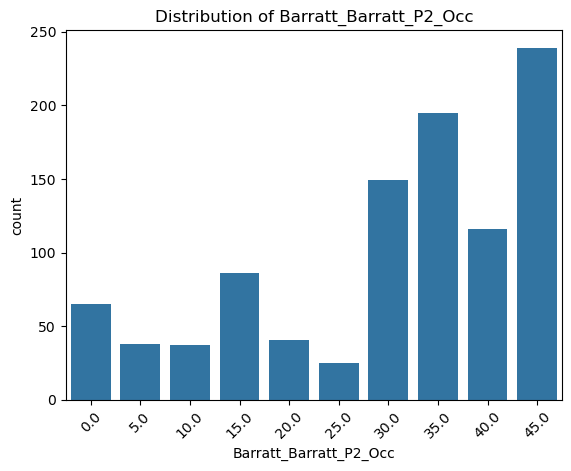

In [147]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
#plt.show()

Text(0, 0.5, 'Frequency Count')

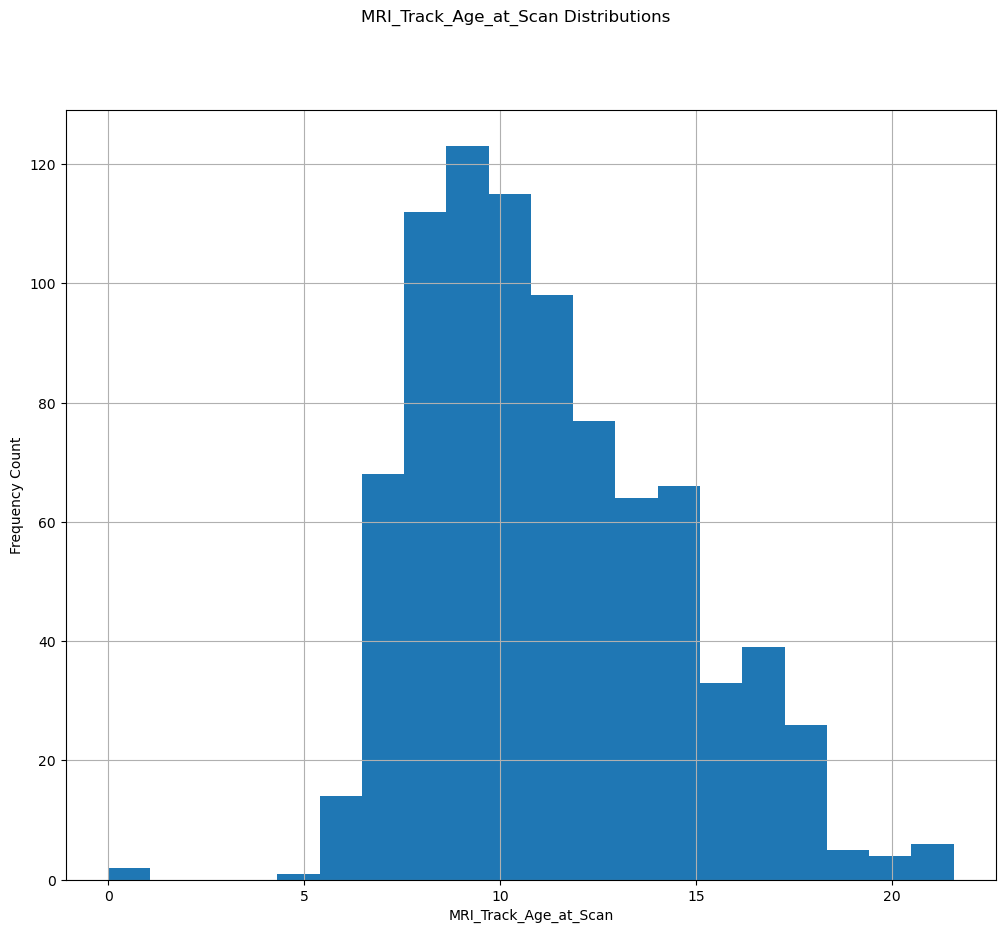

In [145]:
# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
#plt.show()

**Most of the dataset are young sebjects**


Around 10 years old

In [48]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

Text(0, 0.5, 'Count')

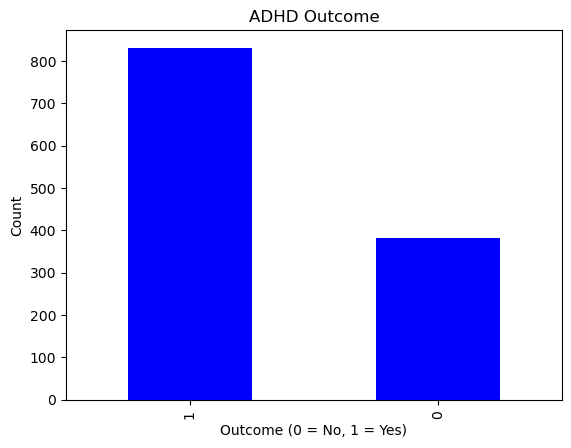

In [151]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
#plt.show()

In [52]:
# Gender distribution
train_Solutions['Sex_F'].value_counts()

Sex_F
0    797
1    416
Name: count, dtype: int64

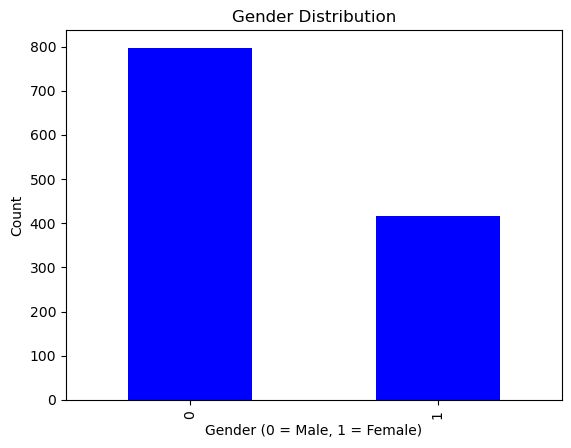

In [54]:
train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

**Gender imbalance in the dataset**


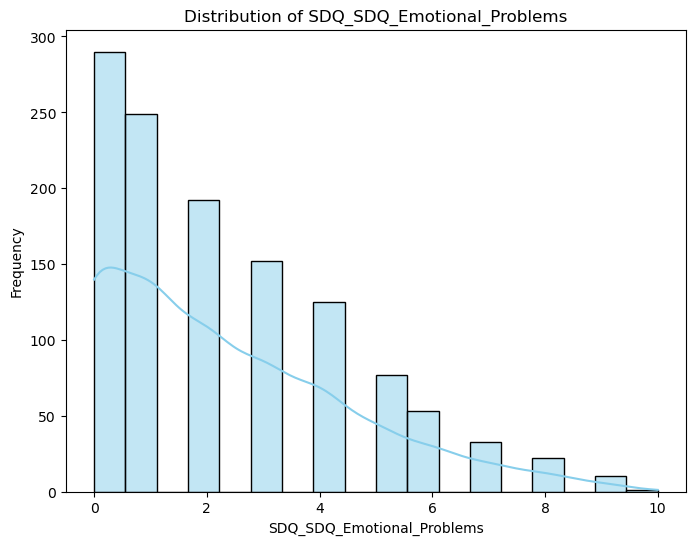

In [56]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

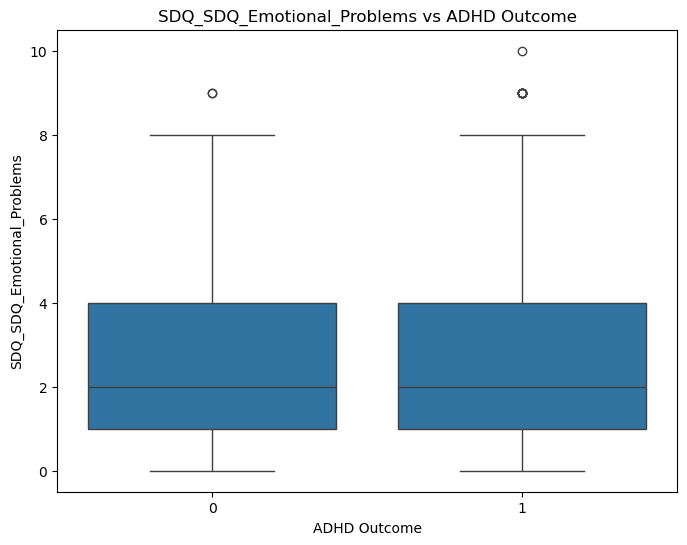

In [58]:
# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()

**Boxplot shows SDQ_Emotional_problem has no correlation to the ADHD outcome**


## Categorial Data

In [68]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

look at Barratt_Barratt_P1_Edu which indicates the Parent 1 level of education

3=Less than 7th grade

6=Junior high/Middle school (9th grade)

9=Partial high school (10th or 11th grade)

12=High school graduate

15=Partial college (at least one year)

18=College education

21=Graduate degree

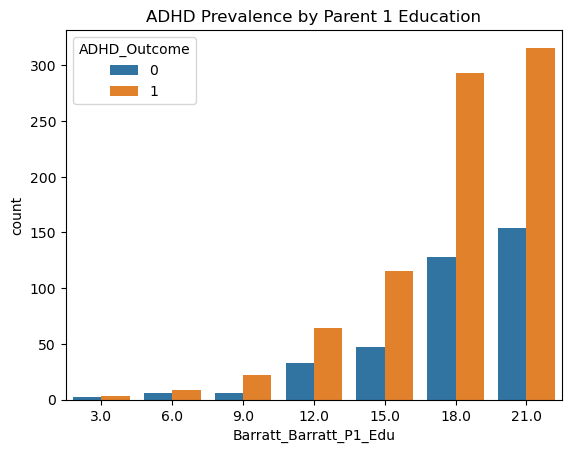

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P1_Edu', hue=train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

In [75]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64

Most of the data points fall into a specific category (e.g., 21 has 470 entries out of a total 1213). This means that even if ADHD prevalence appears higher in this category, it might just reflect that there are more people in this group overall, rather than an actual trend.

In [81]:
#compute ADHD percentage of each group
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
3.0     0.600000
6.0     0.600000
9.0     0.785714
12.0    0.659794
15.0    0.709877
18.0    0.695962
21.0    0.672340
Name: ADHD_Outcome, dtype: float64


While these proportions might appear noteworthy, it is essential to consider the smaller sample size for lower education levels. Smaller sample sizes can lead to greater variability and make the proportions more susceptible to outliers. This means that a few individual cases can disproportionately affect the results, making them less reliable and less representative of the broader population. Therefore, it is crucial to examine sample sizes carefully before drawing any conclusions.

## Feature reduction for FCM using PCA

In [43]:
from sklearn.decomposition import PCA

fcm_ids = train_FCM['participant_id']
fcm_features = train_FCM.drop(columns=['participant_id'])

pca = PCA(n_components=0.95, random_state=42)
fcm_reduced = pca.fit_transform(fcm_features)
fcm_reduced = pd.DataFrame(fcm_reduced, index=fcm_ids.index)
fcm_reduced.insert(0, 'participant_id', fcm_ids)
train_FCM = fcm_reduced

## One hot encoding for categorial data

In [6]:
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [187]:
# One-hot encoding for categorical data
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

# Create a list of all columns except the first (participant_id)
columns_to_encode = train_cat.columns[1:].tolist()

# One-hot encode categorical variables
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
# Convert True/False to 1/0
train_encoded = train_encoded.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == bool else x)

# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

In [189]:
# After training encoding:
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
encoded_columns = train_encoded.columns  # Save this


## Merging Dataframes

In [53]:
# Merge everything
train_df = cat_train_final.merge(train_FCM, on='participant_id')
train_df = train_df.merge(train_Quant, on='participant_id')
train_df = train_df.merge(train_Solutions[['participant_id', 'ADHD_Outcome', 'Sex_F']], on='participant_id')
# ensure it looks accurate
train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,...,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127,1,0
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,...,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN,1,0
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,...,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381,0,1
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,...,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553,0,1
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,...,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574,1,0


## Handling missing values

In [56]:
# Handle missing values properly
# Find columns with missing values
cols_with_na = train_df.columns[train_df.isna().any()].tolist()
print(f"Columns with missing values: {len(cols_with_na)} columns")

# For numerical columns, use mean imputation
for col in train_df.select_dtypes(include=['float64', 'int64']).columns:
    if train_df[col].isna().sum() > 0:
        print(f"Filling NAs in {col}: {train_df[col].isna().sum()} values")
        train_df[col] = train_df[col].fillna(train_df[col].mean())
        
# For categorical columns, use mode imputation
for col in train_df.select_dtypes(include=['object', 'category']).columns:
    if train_df[col].isna().sum() > 0:
        print(f"Filling NAs in {col}: {train_df[col].isna().sum()} values")
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# Verify all NaN values are handled
print("Remaining NaN values:", train_df.isna().sum().sum())

Columns with missing values: 25 columns
Filling NAs in PreInt_Demos_Fam_Child_Ethnicity: 43 values
Filling NAs in PreInt_Demos_Fam_Child_Race: 54 values
Filling NAs in MRI_Track_Scan_Location: 3 values
Filling NAs in Barratt_Barratt_P1_Edu: 15 values
Filling NAs in Barratt_Barratt_P1_Occ: 31 values
Filling NAs in Barratt_Barratt_P2_Edu: 198 values
Filling NAs in Barratt_Barratt_P2_Occ: 222 values
Filling NAs in EHQ_EHQ_Total: 13 values
Filling NAs in ColorVision_CV_Score: 23 values
Filling NAs in APQ_P_APQ_P_CP: 12 values
Filling NAs in APQ_P_APQ_P_ID: 12 values
Filling NAs in APQ_P_APQ_P_INV: 12 values
Filling NAs in APQ_P_APQ_P_OPD: 12 values
Filling NAs in APQ_P_APQ_P_PM: 12 values
Filling NAs in APQ_P_APQ_P_PP: 12 values
Filling NAs in SDQ_SDQ_Conduct_Problems: 9 values
Filling NAs in SDQ_SDQ_Difficulties_Total: 9 values
Filling NAs in SDQ_SDQ_Emotional_Problems: 9 values
Filling NAs in SDQ_SDQ_Externalizing: 9 values
Filling NAs in SDQ_SDQ_Generating_Impact: 9 values
Filling NAs i

## Spliting

In [59]:
X = train_df.drop(columns=['ADHD_Outcome', 'Sex_F'])
y = train_df[['ADHD_Outcome', 'Sex_F']]

# Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y['Sex_F'])

In [61]:
# Save IDs and drop from X
train_ids = X_train['participant_id']
val_ids = X_val['participant_id']
X_train = X_train.drop(columns=['participant_id'])
X_val = X_val.drop(columns=['participant_id'])

## Scaling

In [63]:
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


## Feature selection

In [70]:
def select_features(X, y, k=500):
    selector = SelectKBest(mutual_info_classif, k=k)
    X_new = selector.fit_transform(X, y)
    mask = selector.get_support()
    return X_new, mask

X_train_adhd, adhd_mask = select_features(X_train_scaled, y_train['ADHD_Outcome'])
X_train_sex, sex_mask = select_features(X_train_scaled, y_train['Sex_F'])

# Combine masks
combined_mask = adhd_mask | sex_mask
X_train_final = X_train_scaled[:, combined_mask]
X_val_final = X_val_scaled[:, combined_mask]

print(f"Final feature count: {X_train_final.shape[1]}")


Final feature count: 738


## models and training

In [72]:
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'NeuralNetwork': MLPClassifier(random_state=42, max_iter=500)
}

results = {}

## Logistic Regression


🧾 Logistic Regression Classification Report:
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       114
           1       0.84      0.80      0.82       250

    accuracy                           0.76       364
   macro avg       0.72      0.74      0.73       364
weighted avg       0.77      0.76      0.76       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       239
           1       0.46      0.45      0.45       125

    accuracy                           0.63       364
   macro avg       0.59      0.59      0.59       364
weighted avg       0.63      0.63      0.63       364

🔹 ADHD Confusion Matrix:


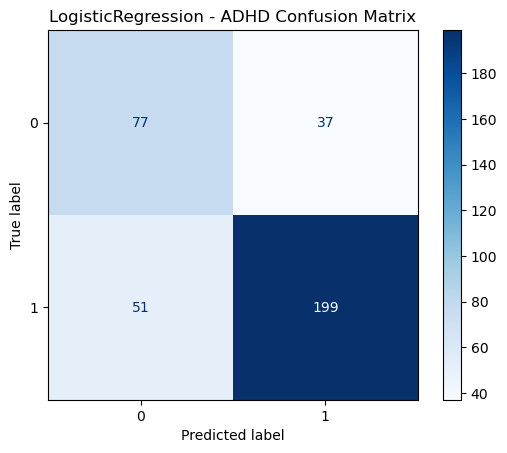

🔹 Sex Confusion Matrix:


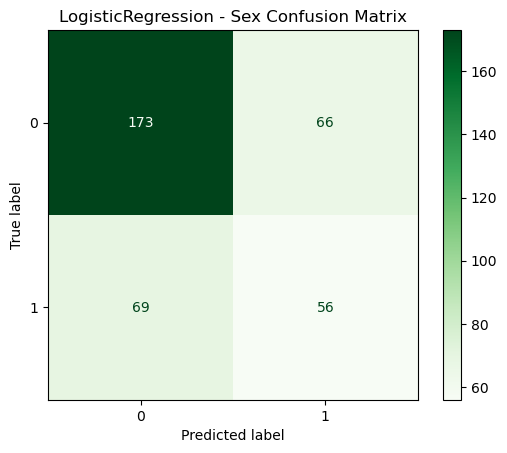

📊 Model Results: {'ADHD_acc': 0.7582417582417582, 'ADHD_f1': 0.8189300411522634, 'Sex_acc': 0.6291208791208791, 'Sex_f1': 0.4534412955465587}


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score
)

# 🎯 Define model
base_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
logreg_model = MultiOutputClassifier(base_model)

# 🏋️ Train model
logreg_model.fit(X_train_final, y_train)

# 🔮 Predict
y_pred = logreg_model.predict(X_val_final)

# 🎯 Split predictions
y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# 🧾 Print reports
print("\n🧾 Logistic Regression Classification Report:")
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))

# 🧮 Confusion matrices
print("🔹 ADHD Confusion Matrix:")
cm_adhd = confusion_matrix(y_true_adhd, y_pred_adhd)
ConfusionMatrixDisplay(cm_adhd, display_labels=[0, 1]).plot(cmap='Blues')
plt.title("LogisticRegression - ADHD Confusion Matrix")
plt.show()

print("🔹 Sex Confusion Matrix:")
cm_sex = confusion_matrix(y_true_sex, y_pred_sex)
ConfusionMatrixDisplay(cm_sex, display_labels=[0, 1]).plot(cmap='Greens')
plt.title("LogisticRegression - Sex Confusion Matrix")
plt.show()

# 🗂 Record results manually if needed
logreg_results = {
    'ADHD_acc': accuracy_score(y_true_adhd, y_pred_adhd),
    'ADHD_f1': f1_score(y_true_adhd, y_pred_adhd),
    'Sex_acc': accuracy_score(y_true_sex, y_pred_sex),
    'Sex_f1': f1_score(y_true_sex, y_pred_sex)
}

print("📊 Model Results:", logreg_results)


In [171]:
from sklearn.model_selection import GridSearchCV


# Base Logistic Regression model
logreg = LogisticRegression(random_state=42, class_weight='balanced')

# Wrap in MultiOutputClassifier
multi_output_logreg = MultiOutputClassifier(logreg)

# Define parameter grid for Logistic Regression
param_grid = {
    'estimator__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'estimator__solver': ['saga'],  # 'saga' supports all penalties
    'estimator__l1_ratio': [0.0, 0.5, 1.0]  # Only used with elasticnet
}



# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=multi_output_logreg,
    param_grid=param_grid,
    scoring='f1_macro',  # Balanced metric across both targets
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train_final, y_train)

# Best estimator
logreg_best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

y_pred = logreg_best_model.predict(X_val_final)

y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# Print detailed classification reports
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))


# Compute F1-scores
adhd_f1 = f1_score(y_true_adhd, y_pred_adhd)
sex_f1 = f1_score(y_true_sex, y_pred_sex)

print(f"ADHD F1-score: {adhd_f1:.4f}")
print(f"Sex F1-score: {sex_f1:.4f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best Parameters: {'estimator__C': 0.1, 'estimator__l1_ratio': 0.5, 'estimator__penalty': 'elasticnet', 'estimator__solver': 'saga'}
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68       114
           1       0.88      0.76      0.82       250

    accuracy                           0.77       364
   macro avg       0.74      0.77      0.75       364
weighted avg       0.79      0.77      0.77       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       239
           1       0.46      0.60      0.52       125

    accuracy                           0.62       364
   macro avg       0.60      0.61      0.60       364
weighted avg       0.65      0.62      0.63       364

ADHD F1-score: 0.8172
Sex F1-score: 0.5190


## RandomForest classification


🧾 RandomForest Classification Report:
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       114
           1       0.82      0.87      0.84       250

    accuracy                           0.78       364
   macro avg       0.74      0.72      0.73       364
weighted avg       0.77      0.78      0.77       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       239
           1       0.55      0.14      0.22       125

    accuracy                           0.66       364
   macro avg       0.61      0.54      0.50       364
weighted avg       0.63      0.66      0.59       364

🔹 ADHD Confusion Matrix:


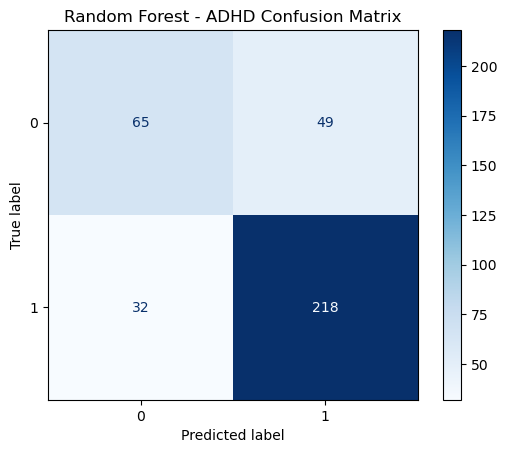

🔹 Sex Confusion Matrix:


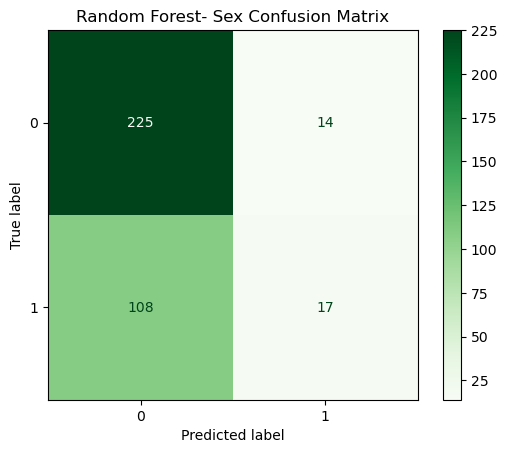

📊 RandomForest classification Results: {'ADHD_acc': 0.7774725274725275, 'ADHD_f1': 0.8433268858800773, 'Sex_acc': 0.6648351648351648, 'Sex_f1': 0.21794871794871795}


In [146]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score
)

# 🎯 Define model
RandomForest_base_model = RandomForestClassifier(
    n_estimators=100,            # Number of trees (try 100–300 for stability)
    max_depth=5,              # You can set this if overfitting becomes an issue
    min_samples_split=2,         # Minimum samples required to split a node
    min_samples_leaf=5,          # Minimum samples at a leaf node
    class_weight='balanced',     # 💡 Important for handling class imbalance
    random_state=42,             # Reproducibility
    n_jobs=-1                    # Use all cores for speed
)
RandomForest_model = MultiOutputClassifier(RandomForest_base_model)

# 🏋️ Train model
RandomForest_model.fit(X_train_final, y_train)

# 🔮 Predict
y_pred = RandomForest_model.predict(X_val_final)

# 🎯 Split predictions
y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# 🧾 Print reports
print("\n🧾 RandomForest Classification Report:")
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))

# 🧮 Confusion matrices
print("🔹 ADHD Confusion Matrix:")
cm_adhd = confusion_matrix(y_true_adhd, y_pred_adhd)
ConfusionMatrixDisplay(cm_adhd, display_labels=[0, 1]).plot(cmap='Blues')
plt.title("Random Forest - ADHD Confusion Matrix")
plt.show()

print("🔹 Sex Confusion Matrix:")
cm_sex = confusion_matrix(y_true_sex, y_pred_sex)
ConfusionMatrixDisplay(cm_sex, display_labels=[0, 1]).plot(cmap='Greens')
plt.title("Random Forest- Sex Confusion Matrix")
plt.show()

# 🗂 Record results manually if needed
logreg_results = {
    'ADHD_acc': accuracy_score(y_true_adhd, y_pred_adhd),
    'ADHD_f1': f1_score(y_true_adhd, y_pred_adhd),
    'Sex_acc': accuracy_score(y_true_sex, y_pred_sex),
    'Sex_f1': f1_score(y_true_sex, y_pred_sex)
}

print("📊 RandomForest classification Results:", logreg_results)


In [173]:

# Base RandomForest model
rf_base_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Wrap with MultiOutputClassifier
multi_rf = MultiOutputClassifier(rf_base_model)
# Define parameter grid (note the 'estimator__' prefix)
param_grid = {
    'estimator__n_estimators': [100, 150, 200],
    'estimator__max_depth': [None, 10, 15, 20],
    'estimator__min_samples_split': [2, 5, 7, 9],
    'estimator__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]
}

# Set up GridSearch
grid_search = GridSearchCV(
    estimator=multi_rf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_final, y_train)

# Best model
best_rf_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)


y_pred = best_rf_model.predict(X_val_final)

y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# Print detailed classification reports
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))


# Compute F1-scores
adhd_f1 = f1_score(y_true_adhd, y_pred_adhd)
sex_f1 = f1_score(y_true_sex, y_pred_sex)

print(f"ADHD F1-score: {adhd_f1:.4f}")
print(f"Sex F1-score: {sex_f1:.4f}")


Fitting 3 folds for each of 336 candidates, totalling 1008 fits
✅ Best Parameters: {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 7, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.78      0.49      0.60       114
           1       0.80      0.94      0.86       250

    accuracy                           0.80       364
   macro avg       0.79      0.71      0.73       364
weighted avg       0.79      0.80      0.78       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       239
           1       0.33      0.02      0.03       125

    accuracy                           0.65       364
   macro avg       0.49      0.50      0.41       364
weighted avg       0.55      0.65      0.53       364

ADHD F1-score: 0.8635
Sex F1-score: 0.0305


## KNN Classification


🧾 KNN Classification Report:
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.36      0.96      0.52       114
           1       0.92      0.22      0.35       250

    accuracy                           0.45       364
   macro avg       0.64      0.59      0.43       364
weighted avg       0.74      0.45      0.40       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.69      0.40      0.51       239
           1       0.36      0.66      0.47       125

    accuracy                           0.49       364
   macro avg       0.53      0.53      0.49       364
weighted avg       0.58      0.49      0.49       364

🔹 ADHD Confusion Matrix:


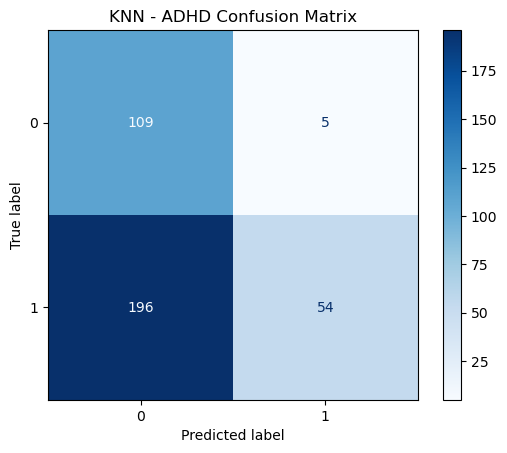

🔹 Sex Confusion Matrix:


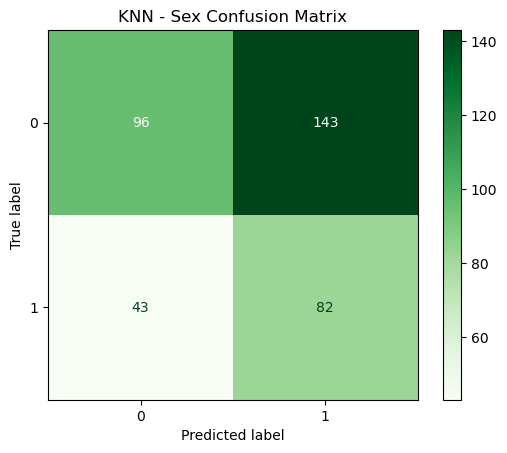

📊 Model Results: {'ADHD_acc': 0.4478021978021978, 'ADHD_f1': 0.34951456310679613, 'Sex_acc': 0.489010989010989, 'Sex_f1': 0.4685714285714286}


In [150]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score
)

from sklearn.neighbors import KNeighborsClassifier

KNN_base_model = KNeighborsClassifier(
    n_neighbors=5,      # Common default, try tuning from 3 to 15
    weights='uniform',  # Or 'distance' — distance-weighted voting
    metric='minkowski', # Default, equivalent to Euclidean when p=2
    p=2,                # p=2 is Euclidean, p=1 is Manhattan
    n_jobs=-1           # Speed up computation if available
)

KNN_model = MultiOutputClassifier(KNN_base_model)

# 🏋️ Train model
KNN_model.fit(X_train_final, y_train)

# 🔮 Predict
y_pred = KNN_model.predict(X_val_final)

# 🎯 Split predictions
y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# 🧾 Print reports
print("\n🧾 KNN Classification Report:")
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))

# 🧮 Confusion matrices
print("🔹 ADHD Confusion Matrix:")
cm_adhd = confusion_matrix(y_true_adhd, y_pred_adhd)
ConfusionMatrixDisplay(cm_adhd, display_labels=[0, 1]).plot(cmap='Blues')
plt.title("KNN - ADHD Confusion Matrix")
plt.show()

print("🔹 Sex Confusion Matrix:")
cm_sex = confusion_matrix(y_true_sex, y_pred_sex)
ConfusionMatrixDisplay(cm_sex, display_labels=[0, 1]).plot(cmap='Greens')
plt.title("KNN - Sex Confusion Matrix")
plt.show()

# 🗂 Record results manually if needed
logreg_results = {
    'ADHD_acc': accuracy_score(y_true_adhd, y_pred_adhd),
    'ADHD_f1': f1_score(y_true_adhd, y_pred_adhd),
    'Sex_acc': accuracy_score(y_true_sex, y_pred_sex),
    'Sex_f1': f1_score(y_true_sex, y_pred_sex)
}

print("📊 Model Results:", logreg_results)


In [157]:

# Define base model and wrap it
KNN_base_model = KNeighborsClassifier()
KNN_multi_model = MultiOutputClassifier(KNN_base_model)

# Define parameter grid
param_grid = {
    'estimator__n_neighbors': list(range(3, 16)),
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['euclidean', 'manhattan']
}

# Set up GridSearch
grid_search = GridSearchCV(
    estimator=KNN_multi_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_final, y_train)

# Best model
best_knn_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)


y_pred = best_knn_model.predict(X_val_final)

y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# Print detailed classification reports
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))


# Compute F1-scores
adhd_f1 = f1_score(y_true_adhd, y_pred_adhd)
sex_f1 = f1_score(y_true_sex, y_pred_sex)

print(f"ADHD F1-score: {adhd_f1:.4f}")
print(f"Sex F1-score: {sex_f1:.4f}")

Fitting 3 folds for each of 52 candidates, totalling 156 fits
✅ Best Parameters: {'estimator__metric': 'euclidean', 'estimator__n_neighbors': 11, 'estimator__weights': 'uniform'}
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.38      0.87      0.53       114
           1       0.85      0.35      0.50       250

    accuracy                           0.51       364
   macro avg       0.62      0.61      0.51       364
weighted avg       0.71      0.51      0.51       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       239
           1       0.40      0.30      0.35       125

    accuracy                           0.60       364
   macro avg       0.54      0.53      0.53       364
weighted avg       0.58      0.60      0.59       364

ADHD F1-score: 0.4986
Sex F1-score: 0.3455


## Decision Tree


🧾 Decision Tree Classification Report:
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61       114
           1       0.84      0.74      0.79       250

    accuracy                           0.73       364
   macro avg       0.70      0.72      0.70       364
weighted avg       0.75      0.73      0.73       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       239
           1       0.35      0.55      0.43       125

    accuracy                           0.50       364
   macro avg       0.51      0.51      0.49       364
weighted avg       0.56      0.50      0.51       364

🔹 ADHD Confusion Matrix:


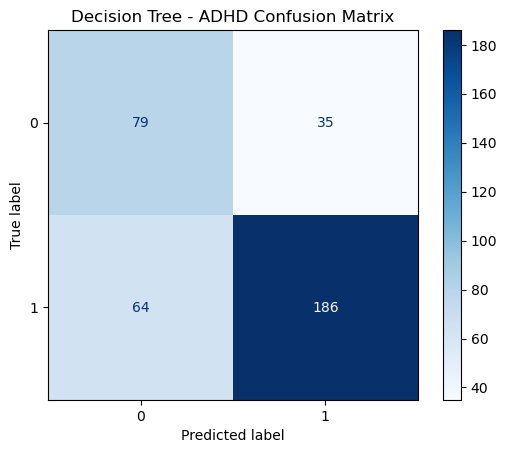

🔹 Sex Confusion Matrix:


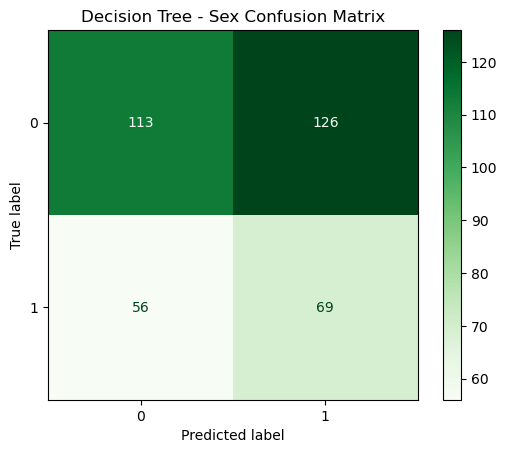

📊 Model Results: {'ADHD_acc': 0.728021978021978, 'ADHD_f1': 0.7898089171974523, 'Sex_acc': 0.5, 'Sex_f1': 0.43125}


In [133]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score
)

from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(
    criterion='gini',        # 'gini' or 'entropy'; both work similarly
    max_depth=5,          # Try limiting this (e.g., 5–20) to prevent overfitting
    min_samples_split=2,     # Increase to make tree more conservative
    min_samples_leaf=5,      # Same as above, higher = more conservative
    class_weight='balanced', # Handles class imbalance (important for your task)
    random_state=42
)


model = MultiOutputClassifier(base_model)

# 🏋️ Train model
model.fit(X_train_final, y_train)

# 🔮 Predict
y_pred = model.predict(X_val_final)

# 🎯 Split predictions
y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# 🧾 Print reports
print("\n🧾 Decision Tree Classification Report:")
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))

# 🧮 Confusion matrices
print("🔹 ADHD Confusion Matrix:")
cm_adhd = confusion_matrix(y_true_adhd, y_pred_adhd)
ConfusionMatrixDisplay(cm_adhd, display_labels=[0, 1]).plot(cmap='Blues')
plt.title("Decision Tree - ADHD Confusion Matrix")
plt.show()

print("🔹 Sex Confusion Matrix:")
cm_sex = confusion_matrix(y_true_sex, y_pred_sex)
ConfusionMatrixDisplay(cm_sex, display_labels=[0, 1]).plot(cmap='Greens')
plt.title("Decision Tree - Sex Confusion Matrix")
plt.show()

# 🗂 Record results manually if needed
logreg_results = {
    'ADHD_acc': accuracy_score(y_true_adhd, y_pred_adhd),
    'ADHD_f1': f1_score(y_true_adhd, y_pred_adhd),
    'Sex_acc': accuracy_score(y_true_sex, y_pred_sex),
    'Sex_f1': f1_score(y_true_sex, y_pred_sex)
}

print("📊 Model Results:", logreg_results)


In [159]:

# Define base model
dt_base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Wrap it in MultiOutputClassifier
dt_multi_model = MultiOutputClassifier(dt_base_model)

# Define parameter grid
param_grid = {
    'estimator__max_depth': [3, 5, 10, 15, None],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['gini', 'entropy']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    dt_multi_model,
    param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_final, y_train)

# Best model
best_dt_model = grid_search.best_estimator_

# Display best parameters
print("Best parameters found for Decision Tree:")
print(grid_search.best_params_)


y_pred = best_dt_model.predict(X_val_final)

y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# Print detailed classification reports
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))


# Compute F1-scores
adhd_f1 = f1_score(y_true_adhd, y_pred_adhd)
sex_f1 = f1_score(y_true_sex, y_pred_sex)

print(f"ADHD F1-score: {adhd_f1:.4f}")
print(f"Sex F1-score: {sex_f1:.4f}")

Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best parameters found for Decision Tree:
{'estimator__criterion': 'entropy', 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2}
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       114
           1       0.80      0.81      0.81       250

    accuracy                           0.73       364
   macro avg       0.69      0.69      0.69       364
weighted avg       0.73      0.73      0.73       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.72      0.31      0.43       239
           1       0.37      0.78      0.50       125

    accuracy                           0.47       364
   macro avg       0.55      0.54      0.46       364
weighted avg       0.60      0.47      0.45       364

ADHD F1-score: 0.8064
Sex F1-score: 0.5000


## Neural Networks


🧾 Neural Networks Classification Report:
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       114
           1       0.83      0.81      0.82       250

    accuracy                           0.76       364
   macro avg       0.72      0.73      0.72       364
weighted avg       0.76      0.76      0.76       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       239
           1       0.52      0.33      0.40       125

    accuracy                           0.66       364
   macro avg       0.61      0.58      0.58       364
weighted avg       0.64      0.66      0.64       364

🔹 ADHD Confusion Matrix:


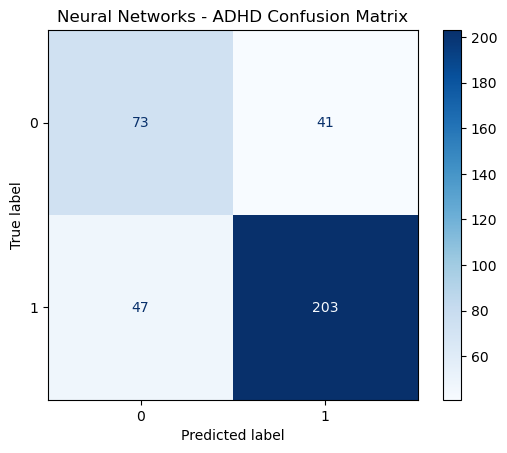

🔹 Sex Confusion Matrix:


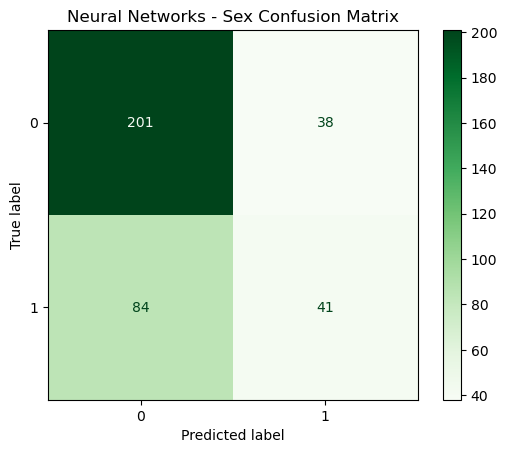

📊 Model Results: {'ADHD_acc': 0.7582417582417582, 'ADHD_f1': 0.8218623481781376, 'Sex_acc': 0.6648351648351648, 'Sex_f1': 0.4019607843137255}


In [135]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score
)

from sklearn.neural_network import MLPClassifier

base_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',          # 'relu' is generally preferred
    solver='adam',              # 'adam' works well in most cases
    alpha=0.0001,               # L2 penalty (regularization term)
    learning_rate='adaptive',   # Start with constant; switch to adaptive if needed
    max_iter=500,               # Increase if model doesn't converge
    random_state=42
)



model = MultiOutputClassifier(base_model)

# 🏋️ Train model
model.fit(X_train_final, y_train)

# 🔮 Predict
y_pred = model.predict(X_val_final)

# 🎯 Split predictions
y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# 🧾 Print reports
print("\n🧾 Neural Networks Classification Report:")
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))

# 🧮 Confusion matrices
print("🔹 ADHD Confusion Matrix:")
cm_adhd = confusion_matrix(y_true_adhd, y_pred_adhd)
ConfusionMatrixDisplay(cm_adhd, display_labels=[0, 1]).plot(cmap='Blues')
plt.title("Neural Networks - ADHD Confusion Matrix")
plt.show()

print("🔹 Sex Confusion Matrix:")
cm_sex = confusion_matrix(y_true_sex, y_pred_sex)
ConfusionMatrixDisplay(cm_sex, display_labels=[0, 1]).plot(cmap='Greens')
plt.title("Neural Networks - Sex Confusion Matrix")
plt.show()

# 🗂 Record results manually if needed
logreg_results = {
    'ADHD_acc': accuracy_score(y_true_adhd, y_pred_adhd),
    'ADHD_f1': f1_score(y_true_adhd, y_pred_adhd),
    'Sex_acc': accuracy_score(y_true_sex, y_pred_sex),
    'Sex_f1': f1_score(y_true_sex, y_pred_sex)
}

print("📊 Model Results:", logreg_results)


In [175]:

# Define base model
nn_base_model = MLPClassifier(random_state=42, max_iter=500)

# Wrap it in MultiOutputClassifier
nn_multi_model = MultiOutputClassifier(nn_base_model)

# Define parameter grid
param_grid = {
    'estimator__hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100), (128, 64, 32)],
    'estimator__activation': ['relu', 'tanh'],
    'estimator__solver': ['adam'],
    'estimator__alpha': [0.0001, 0.001, 0.01],
    'estimator__learning_rate': ['constant', 'adaptive']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    nn_multi_model,
    param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_final, y_train)

# Best model
best_nn_model = grid_search.best_estimator_

# Display best parameters
print("Best parameters found for Neural Network:")
print(grid_search.best_params_)


y_pred = best_nn_model.predict(X_val_final)

y_pred_adhd = y_pred[:, 0]
y_pred_sex = y_pred[:, 1]
y_true_adhd = y_val['ADHD_Outcome'].values
y_true_sex = y_val['Sex_F'].values

# Print detailed classification reports
print("🔹 ADHD Outcome:")
print(classification_report(y_true_adhd, y_pred_adhd))
print("🔹 Sex:")
print(classification_report(y_true_sex, y_pred_sex))


# Compute F1-scores
adhd_f1 = f1_score(y_true_adhd, y_pred_adhd)
sex_f1 = f1_score(y_true_sex, y_pred_sex)

print(f"ADHD F1-score: {adhd_f1:.4f}")
print(f"Sex F1-score: {sex_f1:.4f}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best parameters found for Neural Network:
{'estimator__activation': 'relu', 'estimator__alpha': 0.01, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__solver': 'adam'}
🔹 ADHD Outcome:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       114
           1       0.84      0.81      0.82       250

    accuracy                           0.76       364
   macro avg       0.72      0.73      0.73       364
weighted avg       0.77      0.76      0.76       364

🔹 Sex:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       239
           1       0.51      0.33      0.40       125

    accuracy                           0.66       364
   macro avg       0.61      0.58      0.58       364
weighted avg       0.64      0.66      0.64       364

ADHD F1-score: 0.8228
Sex F1-score: 0.4000


## Best Model 

In [191]:

test_cat = pd.read_excel(r"C:\Users\DELL\Desktop\MachineLearning\classification_project\TEST\TEST_CATEGORICAL.xlsx")
test_FCM = pd.read_csv(r"C:\Users\DELL\Desktop\MachineLearning\classification_project\TEST\TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_Quant = pd.read_excel(r"C:\Users\DELL\Desktop\MachineLearning\classification_project\TEST\TEST_QUANTITATIVE_METADATA.xlsx")

# Apply the SAME PCA to test_FCM
test_fcm_ids = test_FCM['participant_id']
test_fcm_features = test_FCM.drop(columns=['participant_id'])

test_fcm_reduced = pca.transform(test_fcm_features)
test_fcm_reduced = pd.DataFrame(test_fcm_reduced, index=test_fcm_ids.index)
test_fcm_reduced.insert(0, 'participant_id', test_fcm_ids)

# One-hot encoding for categorical data
for col in test_cat.select_dtypes(include='int').columns:
    test_cat[col] = test_cat[col].astype('category')

# Create a list of all columns except the first (participant_id)
columns_to_encode = test_cat.columns[1:].tolist()

# One-hot encode categorical variables
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
# Convert True/False to 1/0
test_encoded = test_encoded.apply(lambda x: x.map({True: 1, False: 0}) if x.dtype == bool else x)

# Ensure all expected columns are present in test set
test_encoded = test_encoded.reindex(columns=encoded_columns, fill_value=0)
# Combine encoded columns with the rest of the DataFrame
test_cat_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)




print("✅ test_cat_final shape:", test_cat_final.shape)
print("✅ test_fcm_reduced shape:", test_fcm_reduced.shape)
print("✅ test_Quant shape:", test_Quant.shape)


# Merge all test files
test_df = test_cat_final.merge(test_fcm_reduced, on='participant_id')
test_df = test_df.merge(test_Quant, on='participant_id')






# Handle missing values
test_df.fillna(test_df.mean(numeric_only=True), inplace=True)

# Drop participant_id but store it for submission
test_ids = test_df['participant_id']
X_test = test_df.drop(columns=['participant_id'])

# Ensure column names are strings
X_test.columns = X_test.columns.astype(str)

# Scale using the SAME fitted scaler
X_test_scaled = scaler.transform(X_test)

# Select SAME features (using the mask from earlier)
X_test_final = X_test_scaled[:, combined_mask]







y_test_pred = logreg_best_model.predict(X_test_final)







submission = pd.DataFrame({
    'participant_id': test_ids,
    'ADHD_Outcome': y_test_pred[:, 0],
    'Sex_F': y_test_pred[:, 1]
})

submission.to_csv(r'C:\Users\DELL\Desktop\MachineLearning\classification_project\submission.csv', index=False)
print("✅ Submission file created!")



✅ test_cat_final shape: (304, 16)
✅ test_fcm_reduced shape: (304, 903)
✅ test_Quant shape: (304, 19)
✅ Submission file created!
